This script can be used to analyze any spotify playlist!

First add imports.

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

Update the list of csv names with your csv names. They should be in a sub-directory called "data".

In [28]:
csv_names = ["drag_party.csv", "european_beachwear.csv", "kings.csv", "made_in_a_facility.csv", "mardi_gras_masquerade.csv", "mardi_gras.csv", "things_that_go_bdump.csv"]

Create a dictionary mapping the csv names to a natural title of the playlist.

In [196]:
csv_names_to_party_name = {"drag_party.csv": "Drag Party", "european_beachwear.csv": "European Beachwear: the party", "kings.csv": "KINGS", "made_in_a_facility.csv": "Made In A Facility — a glutxxn free party", "mardi_gras_masquerade.csv": "Mardi Gras Masquerade", "mardi_gras.csv": "Mardi Gras", "things_that_go_bdump.csv": "Things that go BDUMP in the night"}

Add any colors palets you want for your graphs.

In [197]:
colors = ['lightpink', 'lightblue', '#2070f2', '#fcf7dc', '#bf6efe', '#008f13', 'orange']
pastels = ['lightpink', 'lightblue', '#fcf7dc', '#f0feae', '#e9d9fc', '#faec87', '#beffb5']
trans_masc_green = ['#30562b', '#4d8945', '#83b07d', '#a3b8a0', '#8a8e9b', '#aeb7d7', '#7489ce', '#34457e', '#091f68']

In [198]:
def read_data():
    data_frames = []
    for csv_name in csv_names:
        file_name = "data/" + csv_name
        # print(file_name)
        data_frames.append(pd.read_csv(file_name))
    return pd.concat(data_frames)

df = read_data()
df = df.fillna(0)

There are a bunch of niche genres that spotify lists. This mapping limits wide umbrella genres.

In [83]:
genre_mapping = {
    "t-pop": "pop",
    "vallenato": "folk",
    "melbourne bounce": "edm",
    "big room": "edm",
    "hardstyle": "edm",
    "pop punk": "emo pop",
    "indie rock": "emo pop",
    "rock en español": "rock",
    "colombian pop": "reggaeton",
    "opera": "misc.",
    "doo-wop": "r&b",
    "soul jazz": "jazz",
    "jazz blues": "jazz",
    "vocal jazz": "jazz",
    "americana": "folk",
    "acid jazz": "jazz",
    "jazz funk": "jazz",
    "cool jazz": "jazz",
    "art pop": "hyperpop",
    "trap latino": "reggaeton",
    "urbano latino": "reggaeton",
    "latin pop": "reggaeton",
    "funk rock": "rock",
    "art rock": "rock",
    "glam rock": "rock",
    "classic rock": "rock",
    "eurodance": "pop",
    "french pop": "pop",
    "latin dance": "reggaeton",
    "raï": "pop",
    "modern rock": "rock",
    "hard rock": "rock",
    "progressive rock": "rock",
    "rock and roll": "rock",
    "salsa romantica": "latin",
    "bebop": "jazz",
    "italo dance": "edm",
    "slap house": "edm",
    "merengue": "latin",
    "salsa": "latin",
    "bachata": "latin",
    "album rock": "rock",
    "hardcore hip hop": "hip hop",
    "east coast hip hop": "hip hop",
    "southern hip hop": "hip hop",
    "britpop": "pop",
    "shoegaze": "alternative rock",
    "alternative dance": "alternative rock",
    "pagode": "brazilian pop",
    "pagode baiano": "brazilian pop",
    "emo": "emo pop",
    "neo soul": "r&b",
    "son cubano": "latin",
    "bolero": "latin",
    "cha cha cha": "latin",
    "mambo": "latin",
    "hard bop": "jazz",
    "punk rap": "hip hop",
    "melodic rap": "hip hop",
    "rap rock": "hip hop",
    "indie": "folk",
    "funk pop": "funk",
    "funk carioca": "funk",
    "samba": "latin",
    "crunk": "hip hop",
    "hi-nrg": "edm",
    "trova": "latin",
    "salsa": "latin",
    "nueva trova": "latin",
    "singer-songwriter": "folk",
    "electroclash": "edm",
    "latin afrobeat": "afrobeat",
    "bounce": "hip hop",
    "soft pop": "folk",
    "calypso": "afrobeat",
    "motown": "soul",
    "latin jazz": "latin",
    "blues rock": "blues",
    "soft rock": "pop",
    "glam metal": "misc.",
    "trap": "hip hop",
    "house": "edm",
    "synthpop": "pop",
    "baroque pop": "pop",
    "new wave": "rock",
    "gnawa": "pop",
    "chillwave": "pop",
    "experimental": "misc.",
    "latin folk": "latin",
    "orchestra": "misc.",
    "soundtrack": "misc.",
    "classical": "misc.",
    "choral": "misc.",
    "thai pop": "pop",
    "ragtime": "jazz",
    "alternative r&b": "r&b",
    "europop": "pop"
}

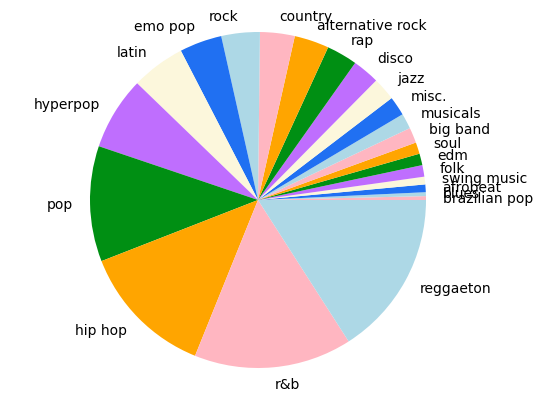

In [193]:
def get_genre_list_from_string(genre_str):
    unstripped_genre_list = genre_str.split(",")
    stripped_genre_list = []
    for genre in unstripped_genre_list:
        new_genre = genre.strip()
        if (new_genre):
            stripped_genre_list.append(new_genre)
    return stripped_genre_list

def create_genre_list_for_all_genres(raw_genre_data):
    genre_list = []
    for song_genre_str in raw_genre_data:
        if not(song_genre_str == 0 or song_genre_str == ''):
            genre_list.extend(get_genre_list_from_string(song_genre_str))
    return genre_list

def create_genre_list_weighted(raw_genre_data):
    genre_list = []
    for song_genre_str in raw_genre_data:
        if not(song_genre_str == 0 or song_genre_str == ''):
            if ("," in song_genre_str):
                index_of_comma = song_genre_str.index(",")
                song_genre_str = song_genre_str[:index_of_comma]
            genre_list.append(song_genre_str)
    return genre_list

def create_genre_dict(genre_list):
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_mapping:
            genre = genre_mapping[genre]
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
    return dict(sorted(genre_dict.items(), key=lambda item: item[1]))

def plot_genre(genre_list, title):
    genre_dictionary = create_genre_dict(genre_list)
    
    # Data to plot
    labels = []
    sizes = []
    
    for x, y in genre_dictionary.items():
        labels.append(x)
        sizes.append(y)
    
    # Plot
    plt.pie(sizes, labels=labels, colors=colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()

def create_genre_plot(df):
    genre_list_weighted = create_genre_list_weighted(df['Genres'].tolist())
    # genre_list_all = create_genre_list_for_all_genres(df['Genres'].tolist())
    
    plot_genre(genre_list_weighted, "")
    # plot_genre(genre_list_all, "Genres, all")

create_genre_plot(df)

In [173]:
def get_sec(time_str_list):
    """Get seconds from time."""
    new_time_str = []
    for time_str in time_str_list:
        m, s = time_str.split(':')
        seconds = int(m) * 60 + int(s)
        new_time_str.append(seconds)
    return new_time_str

def get_avg_length_per_party(column, title):
    parties = []
    count_avg = []
    

    for csv_name in csv_names:
        file_name = "data/" + csv_name
        party_df = pd.read_csv(file_name)
        column_df = get_sec(party_df[column].tolist())
        party_avg = np.mean(np.array(column_df))
        parties.append(csv_names_to_party_name[csv_name])
        count_avg.append(party_avg)
    wrapped_parties = [ '\n'.join(wrap(l, 5)) for l in parties ]

    fig, ax = plt.subplots()
    bar_graph = ax.bar(wrapped_parties,count_avg, align='edge', width=0.5, color=colors)
    ax.set_title(title)

    plt.show()

def get_avg_popularity_per_party(column, title):
    parties = []
    count_avg = []
    

    for csv_name in csv_names:
        file_name = "data/" + csv_name
        party_df = pd.read_csv(file_name)
        party_avg = np.mean(party_df[column])
        parties.append(csv_names_to_party_name[csv_name])
        count_avg.append(party_avg)
    wrapped_parties = [ '\n'.join(wrap(l, 5)) for l in parties ]

    fig, ax = plt.subplots()
    bar_graph = ax.bar(wrapped_parties,count_avg, align='edge', width=0.5, color=colors)
    ax.set_title(title)

    plt.show()

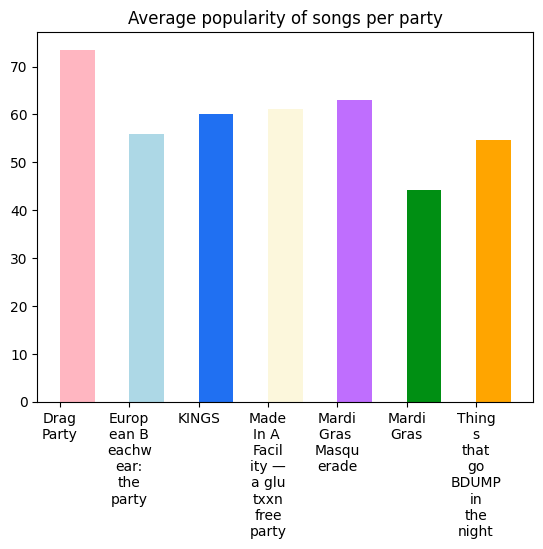

In [157]:
get_avg_popularity_per_party('Popularity', "Average popularity of songs per party")

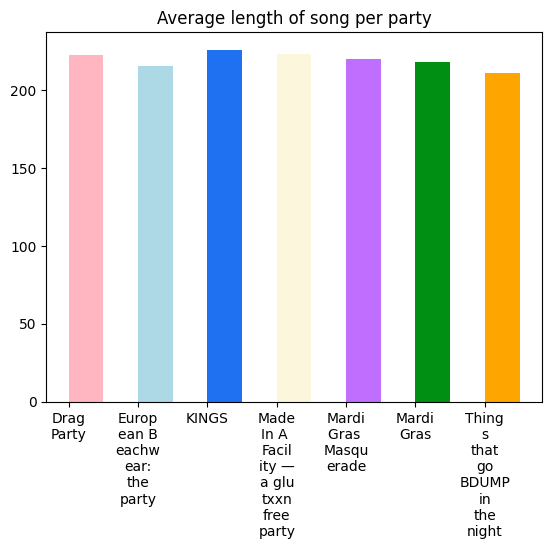

In [174]:
get_avg_length_per_party('Time', "Average length of song per party")